In [253]:
import pandas as pd
import uproot3
from functools import reduce
import struct
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors

## Requires lbtools,
#from lb2jpsil import categorize_reconstructed

In [50]:
def get_final_state():
    final_state = {
        'L'      : ['p', 'pim'],
        'Lb'     : ['p', 'pim', 'mum', 'mup'],
        'KS0'    : ['pip', 'pim'],
        'B0'     : ['pip', 'pim', 'mum', 'mup'],
        }
    return final_state


def generate_MCTRUTH_mapping(mother):
    final_state = get_final_state()
    intermediate = { 
        'L'     : [],
        'KS0'   : [],
        'Lb'    : ['L'],
        'B0'    : ['KS0'],
        }
    mapper = {}
    mapper.update({ part + '_TRUEENDVERTEX_' + coord : 'MCTRUTH_' + part + '_ENDVERTEX_' + coord for part in [mother] + intermediate[mother] for coord in ['X', 'Y', 'Z'] })
    mapper.update({ part + '_TRUEP_' + coord  : 'MCTRUTH_' + part + '_P' + coord for part in final_state[mother] for coord in ['X', 'Y', 'Z'] })
    if intermediate[mother]:
        mapper[f'{intermediate[mother][0]}_MC_MOTHER_ID'] = f'MCTRUTH_{mother}_ID'
        mapper['pim_MC_MOTHER_ID'] = f'MCTRUTH_{intermediate[mother][0]}_ID'
    else:
        mapper[f'{final_state[mother]}_MC_MOTHER_ID'] = f'MCTRUTH_{mother}_ID'
    return mapper

# Import Monte Carlo data

In [196]:
inputMC = '~/data/Lb2JPsiL_Run2_Sim_2016_MagUp_v12.root'

In [219]:
df_reco_list = []

with uproot3.open(inputMC) as MCFile:
    tree_reco = MCFile['Lb_T/DecayTree']
    branches = [k.decode('utf-8') for k in tree_reco.keys()]
    
#    for particle in ['mum', 'mup', 'p', 'pim']:
#        df_reco_list.append(tree_reco.pandas.df(particle + "_PP_POSMOMCOV*", flatten=True))
        
#    df_reco_list.append(tree_reco.pandas.df(["*_Reconstructible", "*_Reconstructed"] + list(generate_MCTRUTH_mapping('Lb').keys()), flatten=True))
    df_reco_list.append(tree_reco.pandas.df(list(generate_MCTRUTH_mapping('Lb').keys()), flatten=True))

df_reco = reduce(lambda left,right: pd.merge(left, right, left_index=True, right_index=True), df_reco_list)
del(df_reco_list)

#df_reco.reset_index(level=1, drop=True, inplace=True)
df_reco

,Lb_TRUEENDVERTEX_X,Lb_TRUEENDVERTEX_Y,Lb_TRUEENDVERTEX_Z,L_TRUEENDVERTEX_X,L_TRUEENDVERTEX_Y,L_TRUEENDVERTEX_Z,p_TRUEP_X,p_TRUEP_Y,p_TRUEP_Z,pim_TRUEP_X,pim_TRUEP_Y,pim_TRUEP_Z,mum_TRUEP_X,mum_TRUEP_Y,mum_TRUEP_Z,mup_TRUEP_X,mup_TRUEP_Y,mup_TRUEP_Z,L_MC_MOTHER_ID,pim_MC_MOTHER_ID
entry,,,,,,,,,,,,,,,,,,,,
0,-0.8630,-0.1927,65.7182,-374.2399,92.8031,5240.7935,-3672.56,857.37,51156.68,-361.17,147.30,4751.58,-2542.08,231.68,22897.40,387.16,-1307.74,12647.73,5122,3122
1,0.8603,-0.0719,19.9543,34.5742,40.8134,2643.6116,130.54,143.99,1927.53,226.25,310.35,14559.07,-984.11,-333.85,15138.59,2139.50,533.55,48138.56,5122,3122
2,0.8603,-0.0719,19.9543,34.5742,40.8134,2643.6116,-136.01,496.36,3795.33,226.25,310.35,14559.07,-984.11,-333.85,15138.59,2139.50,533.55,48138.56,5122,3122
3,0.7515,-0.0880,4.0063,-66.5145,37.9097,3105.4061,-2152.93,1108.75,95956.31,-367.16,314.82,20236.62,-1350.59,571.49,12156.21,-130.28,-842.55,49522.38,-5122,-3122
4,0.7862,0.0399,24.3309,-148.2538,506.3844,3816.0333,-948.53,3236.34,23833.05,-268.59,898.65,7131.32,-1406.82,1905.03,24241.66,1404.22,801.57,27420.14,-5122,-3122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,1.1989,0.1818,52.3606,1.0349,32.1610,2797.5850,-1.97,1789.26,133044.48,-84.72,371.10,21718.74,2932.52,410.08,72975.77,-276.91,992.38,59901.82,5122,3122
829,1.8105,0.6380,31.2955,18.3387,357.4225,6920.7055,128.32,1935.65,35673.55,-24.58,303.61,7565.86,3534.42,-361.25,43184.43,190.26,1368.49,19043.31,-5122,-3122
830,0.2092,1.3249,66.4988,-68.6786,130.5408,7261.6094,-1699.60,3217.34,178150.12,-125.92,206.87,12519.72,-1632.56,3537.60,67518.99,-544.81,2911.22,120093.00,5122,3122


In [220]:
df_truth_list = []

with uproot3.open(inputMC) as MCFile:
    tree_truth = MCFile['Lb_MC/MCDecayTree']
    branches = [k.decode('utf-8') for k in tree_truth.keys()]
    
    for particle in ['mum', 'mup', 'p', 'pim']:
        df_truth_list.append(tree_truth.pandas.df(particle + "_PP_POSMOMCOV*", flatten=True))
        
    df_truth_list.append(tree_truth.pandas.df(["*_Reconstructible", "*_Reconstructed"] + list(generate_MCTRUTH_mapping('Lb').keys()), flatten=True))


df_truth = reduce(lambda left,right: pd.merge(left, right, left_index=True, right_index=True), df_truth_list)
del(df_truth_list)

df_truth.reset_index(level=1, drop=True, inplace=True)
df_truth

,mum_PP_POSMOMCOV_0_0,mum_PP_POSMOMCOV_0_1,mum_PP_POSMOMCOV_0_2,mum_PP_POSMOMCOV_0_3,mum_PP_POSMOMCOV_0_4,mum_PP_POSMOMCOV_0_5,mum_PP_POSMOMCOV_1_1,mum_PP_POSMOMCOV_1_2,mum_PP_POSMOMCOV_1_3,mum_PP_POSMOMCOV_1_4,...,pim_TRUEP_Y,pim_TRUEP_Z,mum_TRUEP_X,mum_TRUEP_Y,mum_TRUEP_Z,mup_TRUEP_X,mup_TRUEP_Y,mup_TRUEP_Z,L_MC_MOTHER_ID,pim_MC_MOTHER_ID
entry,,,,,,,,,,,,,,,,,,,,,
0,0.000185,-0.000017,0.0,-0.057006,0.009210,0.249718,0.000207,0.0,0.004200,-0.066786,...,327.97,10003.64,2974.39,3295.77,121322.63,46.26,4219.05,126773.57,5122,3122
4,0.000098,-0.000011,0.0,-0.015949,0.010074,-0.297316,0.000182,0.0,0.005180,-0.058945,...,293.37,11335.80,-4777.23,-1719.47,64839.86,-1006.43,1048.71,13460.90,-5122,-3122
7,0.000918,-0.000022,0.0,-0.151425,0.004700,0.463885,0.001318,0.0,0.002874,-0.178156,...,-150.54,10919.26,-1882.91,329.50,68329.80,-656.73,-485.16,3983.97,5122,3122
8,0.000524,0.000104,0.0,-0.059531,-0.007951,0.003216,0.000762,0.0,-0.008632,-0.077396,...,49.68,1348.96,760.54,844.31,10923.25,-2187.71,507.83,9360.80,5122,3122
14,0.000042,-0.000020,0.0,-0.034502,0.002811,0.077907,0.000185,0.0,0.004179,-0.058524,...,199.71,5117.51,-7624.72,-1376.62,37327.74,-4584.07,932.89,32034.93,5122,3122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22431,0.004290,0.000099,0.0,-0.367436,-0.012227,0.258261,0.003758,0.0,-0.004355,-0.346145,...,30.51,8900.76,351.48,-907.13,32218.92,-3062.54,-314.02,46205.03,5122,3122
22432,0.000538,0.000002,0.0,-0.083688,-0.000849,0.002385,0.000437,0.0,0.000083,-0.072871,...,-770.69,8023.92,-551.81,-1330.19,17911.69,2611.42,-4951.91,135074.60,-5122,-3122
22434,0.000428,0.000049,0.0,-0.065643,-0.008021,-0.013539,0.000180,0.0,-0.006014,-0.037381,...,818.90,4952.43,-527.89,2284.98,12318.75,537.55,-810.23,8928.20,-5122,-3122


# Merge on long key identifier

In [221]:
df_reco['TrackType'] = 'T'

In [222]:
MCTRUTH_mapping = generate_MCTRUTH_mapping('Lb')
columns_for_long_key = [b for b in MCTRUTH_mapping.keys() if 'TRUEID' not in b]

In [223]:
df_reco['MC_longkey'] = df_reco.loc[:, columns_for_long_key].agg(lambda x : struct.pack('f' * len(columns_for_long_key), *x), axis='columns')
df_truth['MC_longkey'] = df_truth.loc[:, columns_for_long_key].agg(lambda x : struct.pack('f' * len(columns_for_long_key), *x), axis='columns')

In [224]:
df_truth['MC_key'] = df_truth.index
df_reco['Rec_key'] = df_reco.index

In [225]:
df_reco = pd.merge(df_reco, df_truth.loc[:, ['MC_longkey', 'MC_key']], on='MC_longkey', how='left')

In [226]:
df_reco_grouped = df_reco.loc[:, ['MC_longkey', 'Rec_key', 'TrackType']].groupby('MC_longkey').agg({'Rec_key' : ['min', 'count'], 'TrackType' : ['first']}).reset_index()
df_reco_grouped.columns = ['MC_longkey', 'Rec_key', 'N_rec_matches', 'TrackType']

In [227]:
df_truth = pd.merge(df_truth, df_reco_grouped, on='MC_longkey', how='left')

In [228]:
df_reco.drop('MC_longkey', inplace=True, axis='columns')
df_truth.drop('MC_longkey', inplace=True, axis='columns')

In [229]:
frac_reco_match_gen = (~df_reco['MC_key'].isna()).sum() / len(df_reco) * 100
print(f'The fraction of the reconstructed candidates with full match in the generated sample is {frac_reco_match_gen:.2f}%')

frac_gen_match_reco = (~df_truth['Rec_key'].isna()).sum() / len(df_truth) * 100
print(f'The fraction of the generated signal events with full match in the reconstructed sample is {frac_gen_match_reco:.2f}%')

The fraction of the reconstructed candidates with full match in the generated sample is 87.27%
The fraction of the generated signal events with full match in the reconstructed sample is 11.83%


In [230]:
df_reco.index.name = 'Rec_key'
df_reco.drop('Rec_key', inplace=True, axis='columns')
df_truth.index.name = 'MC_key'
df_truth.drop('MC_key', inplace=True, axis='columns')

In [231]:
df_reco['MC_key'] = pd.to_numeric(df_reco['MC_key'].fillna(-1), downcast='signed')
df_truth['Rec_key'] = pd.to_numeric(df_truth['Rec_key'].fillna(-1), downcast='signed')
df_truth['N_rec_matches'] = pd.to_numeric(df_truth['N_rec_matches'].fillna(0), downcast='unsigned')

In [232]:
df_reco.drop(columns=MCTRUTH_mapping.keys(), inplace=True)
df_truth.rename(columns=MCTRUTH_mapping, inplace=True)

In [233]:
## Finally merge
df_MC = pd.merge(df_truth, df_reco.loc[df_reco['MC_key'] >= 0, :].drop('TrackType', axis='columns').groupby('MC_key').first(), how='left', on='MC_key')

# Assign reconstruction categories

In [9]:
def categorize_reconstructed(df):
    reconstructible_categories = { -1  : 'NoClassification'  , # No MC classification possible (e.g. NO MC)
                                    0  : 'OutsideAcceptance' , # Outside detector acceptance
                                    1  : 'NotReconstructible', # In acceptance but not reconstructible
                                    2  : 'ChargedLong'       , # Reconstructible as a Long charged track
                                    3  : 'ChargedDownstream' , # Reconstructible as a Downstream charged track
                                    4  : 'ChargedUpstream'   , # Reconstructible as an Upstream charged track
                                    5  : 'ChargedTtrack'     , # Reconstructible as a T charged track
                                    6  : 'ChargedVelo'       , # Reconstructible as a VELO charged track
                                    50 : 'Neutral'           } # Reconstructible as a Neutral particle (To Be Extended)

    reconstructed_categories = { -1  : 'NoClassification' , # No MC classification possible (e.g. NO MC)
                                  0  : 'NotReconstructed' , # Not reconstructed
                                  1  : 'ChargedLong'      , # Reconstructed as a Long charged track
                                  2  : 'ChargedDownstream', # Reconstructed as a Downstream charged track
                                  3  : 'ChargedUpstream'  , # Reconstructed as an Upstream charged track
                                  4  : 'ChargedTtrack'    , # Reconstructed as a T charged track
                                  5  : 'ChargedVelo'      , # Reconstructed as a VELO charged track
                                  6  : 'ChargedVeloR'     , # Reconstructed as a 2D Velo track
                                  7  : 'ChargedMuon'      , # Reconstructed as a Muon track
                                  50 : 'Neutral'          , # Reconstructed as a Neutral particle
                                  51 : 'NeutralMergedPi0' , # Reconstructed as a merged pi0
                                  52 : 'CatUnknown'       } # Reconstructed as a type that doesn't fit other categories
    for c in df.columns:
        if c.endswith('Reconstructible'):
            df[c] = df[c].astype(dtype='category')
            df[c].cat.rename_categories(reconstructible_categories, inplace=True)
        elif c.endswith('Reconstructed'):
            df[c] = df[c].astype(dtype='category')
            df[c].cat.rename_categories(reconstructed_categories, inplace=True)

In [236]:
categorize_reconstructed(df_MC)

In [241]:
## Select reconstructed muons. There is a very small (~4500) number of reconstructed events
## where the 'PID_Reconstructed' variables do not match the corresponding 'PID_Reconstructible'.
reconstructibleMuons = (df_MC['mum_Reconstructible']=='ChargedLong') & (df_MC['mup_Reconstructible']=='ChargedLong')
reconstructedMuons = (df_MC['mum_Reconstructed']=='ChargedLong') & (df_MC['mup_Reconstructed']=='ChargedLong')

## The mismatched events here are a bit more (~11k). I suppose this could be because of particles
## potentially reconstructible as something "better" than TTRACKS (e.g. LONG) that get a degreaded result.
reconstructibleTTracks = (df_MC['pim_Reconstructible']=='ChargedTtrack') & (df_MC['p_Reconstructible']=='ChargedTtrack')
reconstructedTTracks = (df_MC['pim_Reconstructed']=='ChargedTtrack') & (df_MC['p_Reconstructed']=='ChargedTtrack')

## This selects all events actually reconstructed in the MC_reco. Since we have constrained reconstruction
## of muons, protons and pions, the deficit must be due to Lambda and/or Lambdab reconstrution failure.
## (Or J/psi, sure, but we assume that two LONG muons are tracked much better than two TTRACKS proton and pions.)
allReconstructedEvents = ((df_MC['Rec_key'] >= 0) & (df_MC['TrackType'] == 'T'))

In [242]:
selectionCandidates = (
    reconstructibleMuons & reconstructedMuons
    & reconstructibleTTracks & reconstructedTTracks
)

selectionPassed = selectionCandidates & allReconstructedEvents

In [243]:
df_MC_Reconstructed = df_MC[selectionPassed]
df_MC_Failed = df_MC[selectionCandidates & ~selectionPassed]

# Covariance matrix comparison

In [258]:
list(df_MC_Failed)

['mum_PP_POSMOMCOV_0_0',
 'mum_PP_POSMOMCOV_0_1',
 'mum_PP_POSMOMCOV_0_2',
 'mum_PP_POSMOMCOV_0_3',
 'mum_PP_POSMOMCOV_0_4',
 'mum_PP_POSMOMCOV_0_5',
 'mum_PP_POSMOMCOV_1_1',
 'mum_PP_POSMOMCOV_1_2',
 'mum_PP_POSMOMCOV_1_3',
 'mum_PP_POSMOMCOV_1_4',
 'mum_PP_POSMOMCOV_1_5',
 'mum_PP_POSMOMCOV_2_2',
 'mum_PP_POSMOMCOV_2_3',
 'mum_PP_POSMOMCOV_2_4',
 'mum_PP_POSMOMCOV_2_5',
 'mum_PP_POSMOMCOV_3_3',
 'mum_PP_POSMOMCOV_3_4',
 'mum_PP_POSMOMCOV_3_5',
 'mum_PP_POSMOMCOV_4_4',
 'mum_PP_POSMOMCOV_4_5',
 'mum_PP_POSMOMCOV_5_5',
 'mup_PP_POSMOMCOV_0_0',
 'mup_PP_POSMOMCOV_0_1',
 'mup_PP_POSMOMCOV_0_2',
 'mup_PP_POSMOMCOV_0_3',
 'mup_PP_POSMOMCOV_0_4',
 'mup_PP_POSMOMCOV_0_5',
 'mup_PP_POSMOMCOV_1_1',
 'mup_PP_POSMOMCOV_1_2',
 'mup_PP_POSMOMCOV_1_3',
 'mup_PP_POSMOMCOV_1_4',
 'mup_PP_POSMOMCOV_1_5',
 'mup_PP_POSMOMCOV_2_2',
 'mup_PP_POSMOMCOV_2_3',
 'mup_PP_POSMOMCOV_2_4',
 'mup_PP_POSMOMCOV_2_5',
 'mup_PP_POSMOMCOV_3_3',
 'mup_PP_POSMOMCOV_3_4',
 'mup_PP_POSMOMCOV_3_5',
 'mup_PP_POSMOMCOV_4_4',


# $\mu^-$

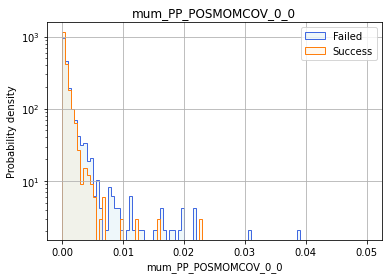

In [257]:
featureToPlot = 'mum_PP_POSMOMCOV_0_0'
featureLabel = 'mum_PP_POSMOMCOV_0_0'
featureTitle = 'mum_PP_POSMOMCOV_0_0'
binNumber = 100
boundaries = (0,.05)
yscale = 'log'
normalized = True

if normalized:
    ylabel = 'Probability density'
else:
    ylabel = 'Events'

plt.hist(
    df_MC_Failed[featureToPlot],
    range=boundaries, bins=binNumber,
    histtype='stepfilled',
    fc=mcolors.to_rgba('lightblue', alpha=0.2),
    edgecolor='royalblue',
    label='Failed',
    density=normalized
)

plt.hist(
    df_MC_Reconstructed[featureToPlot],
    range=boundaries, bins=binNumber,
    histtype='stepfilled',
    fc=mcolors.to_rgba('navajowhite', alpha=0.2),
    edgecolor='tab:orange',
    label='Success',
    density=normalized
)

plt.xlabel(featureLabel)
plt.ylabel(ylabel)
plt.yscale(yscale)
plt.grid()
plt.title(featureTitle)
plt.legend()
plt.show()

In [263]:
df_MC['mum_PP_POSMOMCOV_0_1'].min()

-1.3737066

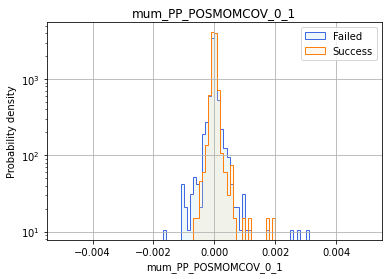

In [268]:
featureToPlot = 'mum_PP_POSMOMCOV_0_1'
featureLabel = 'mum_PP_POSMOMCOV_0_1'
featureTitle = 'mum_PP_POSMOMCOV_0_1'
binNumber = 100
boundaries = (-.005,.005)
yscale = 'log'
normalized = True

if normalized:
    ylabel = 'Probability density'
else:
    ylabel = 'Events'

plt.hist(
    df_MC_Failed[featureToPlot],
    range=boundaries, bins=binNumber,
    histtype='stepfilled',
    fc=mcolors.to_rgba('lightblue', alpha=0.2),
    edgecolor='royalblue',
    label='Failed',
    density=normalized
)

plt.hist(
    df_MC_Reconstructed[featureToPlot],
    range=boundaries, bins=binNumber,
    histtype='stepfilled',
    fc=mcolors.to_rgba('navajowhite', alpha=0.2),
    edgecolor='tab:orange',
    label='Success',
    density=normalized
)

plt.xlabel(featureLabel)
plt.ylabel(ylabel)
plt.yscale(yscale)
plt.grid()
plt.title(featureTitle)
plt.legend()
plt.show()